[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # function evals   = 48
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.528
    reduced chi-square = 5.155
    Akaike info crit   = 417.865
    Bayesian info crit = 446.036
[[Variables]]
    exp_decay:       90.9508859 +/- 1.103105 (1.21%) (init= 93.24905)
    exp_amplitude:   99.0183282 +/- 0.537487 (0.54%) (init= 162.2102)
    g1_sigma:        16.6725753 +/- 0.160481 (0.96%) (init= 15)
    g1_center:       107.030954 +/- 0.150067 (0.14%) (init= 105)
    g1_amplitude:    4257.77319 +/- 42.38336 (1.00%) (init= 2000)
    g1_fwhm:         39.2609138 +/- 0.377905 (0.96%)  == '2.3548200*g1_sigma'
    g1_height:       101.880231 +/- 0.592171 (0.58%)  == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
    g2_sigma:        13.8069484 +/- 0.186794 (1.35%) (init= 15)
    g2_center:       153.270100 +/- 0.194667 (0.13%) (i

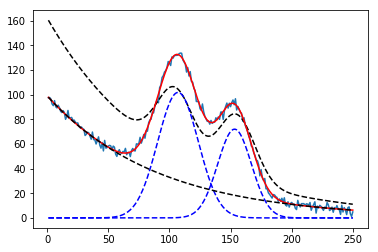

In [1]:
#!/usr/bin/env python
#<examples/doc_nistgauss.py>
import numpy as np
from lmfit.models import GaussianModel, ExponentialModel
import sys
import matplotlib.pyplot as plt

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1  = GaussianModel(prefix='g1_')
pars.update( gauss1.make_params())

pars['g1_center'].set(105, min=75, max=125)
pars['g1_sigma'].set(15, min=3)
pars['g1_amplitude'].set(2000, min=10)

gauss2  = GaussianModel(prefix='g2_')

pars.update(gauss2.make_params())

pars['g2_center'].set(155, min=125, max=175)
pars['g2_sigma'].set(15, min=3)
pars['g2_amplitude'].set(2000, min=10)

mod = gauss1 + gauss2 + exp_mod


init = mod.eval(pars, x=x)
plt.plot(x, y)
plt.plot(x, init, 'k--')

out = mod.fit(y, pars, x=x)

comps = out.eval_components(x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.plot(x, comps['g1_'], 'b--')
plt.plot(x, comps['g2_'], 'b--')
plt.plot(x, comps['exp_'], 'k--')

plt.show()
#<end examples/doc_nistgauss.py>

 ITER  1 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  2 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  3 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  4 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  5 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  6 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  7 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  8 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  9 ['7.07188', '24.56293', '27.81307', '3.18347', '-0.20149', '16.65301', '1.56900']
 ITER  10 ['7.07188', '24.56293', '27.81307', '3.18347', '-0.20149', '16.65301', '1.56900']
 ITER  11 ['7.07188', '24.56293', '27.81307', '3.18347', '-0.20149', '16.65301', '1.56900']
 ITER  12 ['7.07188', '24.562

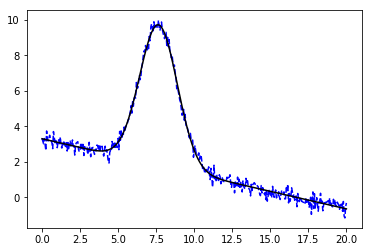

In [2]:
from numpy import linspace, random
import matplotlib.pylab as pylab

from lmfit.models import LinearModel, GaussianModel
from lmfit.lineshapes import gaussian

def per_iteration(pars, iter, resid, *args, **kws):
    print(" ITER ", iter, ["%.5f" % p for p in pars.values()])


x = linspace(0., 20, 401)
y = gaussian(x, amplitude=24.56, center=7.6543, sigma=1.23)
y = y  - .20*x + 3.333 + random.normal(scale=0.23,  size=len(x))

mod = GaussianModel(prefix='peak_') + LinearModel(prefix='bkg_')

pars = mod.make_params()
pars['peak_amplitude'].value = 3.0
pars['peak_center'].value = 6.0
pars['peak_sigma'].value = 2.0
pars['bkg_intercept'].value = 0.0
pars['bkg_slope'].value = 0.0


out = mod.fit(y, pars, x=x, iter_cb=per_iteration)

pylab.plot(x, y, 'b--')

print(' Nfev = ', out.nfev)
print( out.fit_report())

pylab.plot(x, out.best_fit, 'k-')
pylab.show()